In [2]:
import tensorflow as tf
import os
from PIL import Image

In [65]:
HEIGHT, WIDTH = 228, 260
DATA_DIR = 'h:/COMP3710/AKOA_Analysis'

def get_label(file_path):
    print("getting label")
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # Extract LEFT/RIGHT data from filename
    parts = tf.strings.split(parts[-1], '.')
    parts = tf.strings.split(parts[0], '_')
    pattern = tf.constant("right")
    
    is_right = pattern == tf.strings.lower(parts[-1])
    return tf.cast(is_right, dtype='uint8')

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_png(img, channels=1)
    # resize the image to the desired size
    return img #tf.image.resize(img, [HEIGHT, WIDTH])

def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label
        
# Data processing
def load_knee_data(path):
    dataset = tf.data.Dataset.list_files(f"{path}/*.png")
    #print(list(dataset.as_numpy_iterator()))
    for f in dataset.take(5):
        print(f.numpy())
    
    # set autotune so many images can be processed in parallel
    return dataset.map(process_path, num_parallel_calls=tf.data.experimental.AUTOTUNE)

dataset = load_knee_data(DATA_DIR)

True
H:\COMP3710\report\recognition\Keats-classifiers
b'h:\\COMP3710\\AKOA_Analysis\\OAI9847829_BaseLine_3_de3d1_SAG_3D_DESS_WE_RIGHT.nii.gz_37.png'
b'h:\\COMP3710\\AKOA_Analysis\\OAI9841815_BaseLine_3de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_14.png'
b'h:\\COMP3710\\AKOA_Analysis\\OAI9062645_BaseLine_4_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_31.png'
b'h:\\COMP3710\\AKOA_Analysis\\OAI9171097_BaseLine_4_de3d1_SAG_3D_DESS_WE_Right.nii.gz_33.png'
b'h:\\COMP3710\\AKOA_Analysis\\OAI9615754_BaseLine_3_de3d1_SAG_3D_DESS_WE_LEFT.nii.gz_37.png'
getting label
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  1


Image shape:  (228, 260, 1)
Label:  0
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  1
Image shape:  (228, 260, 1)
Label:  0
Image shape:  (228, 260, 1)
Label:  0


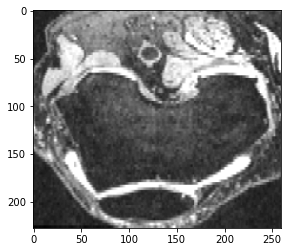

In [71]:
import matplotlib.pyplot as plt

def show_image(image_tensor):
    plt.imshow(image_tensor)
    plt.gray()
    

for image, label in dataset.take(5):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
    show_image(image)